In [ ]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
#levs=np.concatenate((np.linspace(0,0.01,20),np.linspace(0.011,1,1)))


def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)


MHH_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_9th/ql_path.xy.nc',decode_times=False)
SAM_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/EUREC4A_9Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_2D_1024_HOURLY_CONCAT.nc',decode_times=True)
SAM_NOAA_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-09_512sqx151_200m_FY2M_RRTM_NA471.001.hera.2023-12-24-20h09m55s/OUT_2D/NOAA_SAM_EUREC4A_2020-02-09_512sqx151_200m_FY2M_RRTM_NA471.001_eurec4a_20200209.kpt_2D_0300s.nc',decode_times=True)
DALES_2d=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_Results/Feb9_1024x1024_150m/fieldint.lwp.001.nc',decode_times=False)
MHH_2d['ql_path'] = MHH_2d['ql_path'].where(MHH_2d['ql_path']>1e-3,np.nan)
SAM_2d['LWP']=SAM_2d['LWP'].where(SAM_2d['LWP']>1e-3,np.nan)
SAM_NOAA_2d['CWP']=SAM_NOAA_2d['CWP'].where(SAM_NOAA_2d['CWP']>1e-3,np.nan)
DALES_2d['lwp']=DALES_2d['lwp'].where(DALES_2d['lwp']>1e-3,np.nan)


#pl.figure(figsize=(7, 7))
#SAM_NOAA_2d['HMIX'].isel(time=int(65*3600/1800)).transpose().plot.contourf()



In [ ]:
hr_plot=34
levs=powspace(0.01,2.5,2,20)



fig, axs = pl.subplots(2, 2, figsize=(13, 13))
pl.subplot(221)

MHH_2d['ql_path'].isel(time=int(hr_plot*3600/300)).plot.contourf(levels=levs,cmap='terrain',add_colorbar=False)
pl.title('MicroHH')
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.subplot(222)

SAM_2d['LWP'].isel(time=int(hr_plot*3600/3600)).transpose().plot.contourf(levels=levs,cmap='terrain')
pl.xlabel('')
pl.ylabel('')
pl.title('SAM')
pl.yticks([])
pl.xticks([])
pl.subplot(223)
SAM_NOAA_2d['CWP'].isel(time=int((hr_plot)*3600/300)).plot.contourf(levels=levs,cmap='terrain',add_colorbar=False)
pl.xlabel('')
pl.ylabel('')
pl.title('SAM_NOAA')
pl.yticks([])
pl.xticks([])
pl.subplot(224)
DALES_2d['lwp'].isel(time=int(hr_plot*3600/900)).plot.contourf(levels=levs,cmap='terrain')
pl.xlabel('')
pl.ylabel('')
pl.title('DALES')
pl.yticks([])
pl.xticks([])
print(DALES_2d['lwp'].isel(time=int(hr_plot*3600/900)).mean(dim=['xt','yt']).values)



In [1]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np


pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
#levs=np.concatenate((np.linspace(0,0.01,20),np.linspace(0.011,1,1)))


def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)


MHH_qlpath=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_path.xy.nc',decode_times=False)
MHH_qlbase=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_base.xy.nc',decode_times=False)
MHH_qltop=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/ql_top.xy.nc',decode_times=False)
MHH_qrpath=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/qr_path.xy.nc',decode_times=False)
MHH_rrbot=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/2D_outputs/Feb_2nd/rr_bot.xy.nc',decode_times=False)

hr_plot=64
levs=powspace(0.01,2.5,2,20)


Text(0.5, 1.0, 'Surface Precipitation Rate')

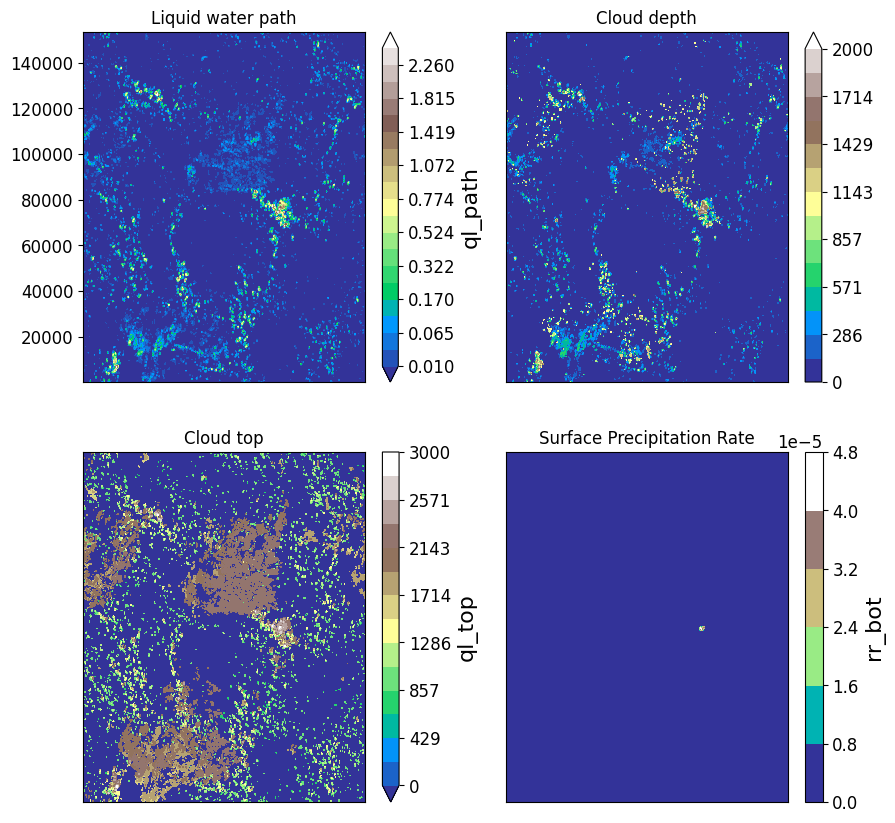

In [3]:
hr_plot=67
fig, axs = pl.subplots(2, 2, figsize=(10, 10))
pl.subplot(221)

MHH_qlpath['ql_path'].isel(time=int(hr_plot*3600/300)).plot.contourf(levels=levs,cmap='terrain',add_colorbar=True)
pl.xticks([])

pl.xlabel('')
pl.ylabel('')
pl.title('Liquid water path')

pl.subplot(222)
(MHH_qltop['ql_top']-MHH_qlbase['ql_base']).isel(time=int(hr_plot*3600/300)).plot.contourf(levels=np.linspace(0,2000,15),cmap='terrain',add_colorbar=True)
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.title('Cloud depth')

pl.subplot(223)
(MHH_qltop['ql_top']).isel(time=int(hr_plot*3600/300)).plot.contourf(levels=np.linspace(0,3000,15),cmap='terrain',add_colorbar=True)
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.title('Cloud top')

pl.subplot(224)
(MHH_rrbot['rr_bot']).isel(time=int(hr_plot*3600/300)).plot.contourf(cmap='terrain',add_colorbar=True)
pl.xticks([])
pl.yticks([])
pl.xlabel('')
pl.ylabel('')
pl.title('Surface Precipitation Rate')

(0.0, 3500.0)

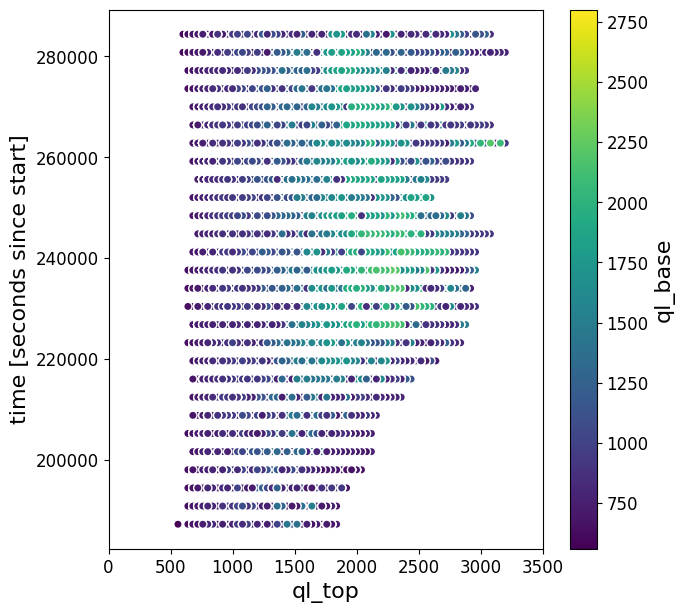

In [53]:
pl.figure(figsize=(7, 7))
MHH_qlbase['ql_top']=MHH_qltop['ql_top']

hr_plot=52
MHH_qlbase=MHH_qlbase.where(MHH_qlbase['ql_base']>1e-3,np.nan)
MHH_qlbase.isel(time=slice(int(hr_plot*3600/300),int((hr_plot+28)*3600/300),12)).plot.scatter(x='ql_top',y='time',hue='ql_base')
pl.xlim(0,3500)

